##**Library Imports**

In [1]:
import pickle
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
print(f"NumPy version: {np.__version__}")
print(f"TensorFlow version: {tf.__version__}")
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")
print(f"Scikit-learn version: {sklearn.__version__}")

NumPy version: 1.26.4
TensorFlow version: 2.17.1
Pandas version: 2.2.2
Matplotlib version: 3.8.0
Scikit-learn version: 1.5.2


##**Load Dataset**

In [2]:
# 1. Load Dataset
file_path = '/content/UpdatedResumeDataSet.csv'  # Ganti dengan path file dataset-mu
dataset = pd.read_csv(file_path)

##**Data Cleaning**

In [3]:
# Function to clean text
def clean_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])
    return text
# Data cleaning
dataset['Resume'] = dataset['Resume'].apply(clean_text)

##**Text Tokenization dan Label Encoding**

In [4]:
# Tokenizer setup
texts = dataset['Resume'].values
labels = dataset['Category'].values

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
max_length = 200  # Adjusted based on resume text length
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

# Label encoding
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

##**Train-Test Split**

In [5]:
# Splitting data (train/test split)
from sklearn.model_selection import train_test_split
train_padded, test_padded, train_labels, test_labels = train_test_split(
    padded_sequences, encoded_labels, test_size=0.2, random_state=42
)

##**Model Architecture**

In [6]:
# Model architecture
from tensorflow.keras.layers import Bidirectional

embedding_dim = 100
model = Sequential([
    Embedding(input_dim=5000, output_dim=embedding_dim, input_length=max_length),
    Bidirectional(LSTM(128, return_sequences=True)),
    Dropout(0.5),
    LSTM(64),
    Dense(32, activation='relu'),
    Dense(len(set(labels)), activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


##**Callbacks for Training**

In [7]:
# Callbacks for training
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
# ModelCheckpoint setup

model_checkpoint = ModelCheckpoint(
    filepath='best_resume_classifier_model.keras',  # Ganti dengan ekstensi .keras
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

##**Model Training**

In [8]:
# Model training
history = model.fit(
    train_padded, train_labels,
    validation_data=(test_padded, test_labels),
    epochs=20,
    batch_size=32,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.0694 - loss: 3.2011
Epoch 1: val_loss improved from inf to 3.07151, saving model to best_resume_classifier_model.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 72ms/step - accuracy: 0.0699 - loss: 3.2001 - val_accuracy: 0.1036 - val_loss: 3.0715
Epoch 2/20
24/25 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.1638 - loss: 2.9384
Epoch 2: val_loss improved from 3.07151 to 2.70153, saving model to best_resume_classifier_model.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.1649 - loss: 2.9354 - val_accuracy: 0.2228 - val_loss: 2.7015
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.2212 - loss: 2.5880
Epoch 3: val_loss improved from 2.70153 to 2.34903, saving model to best_resume_classifier_model.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.2225 - loss: 2.5837 - val_accuracy: 0.2642 - val_loss: 2.3490
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.2866 - loss: 2.2103
Epoch 

##**Training Results Visualization**

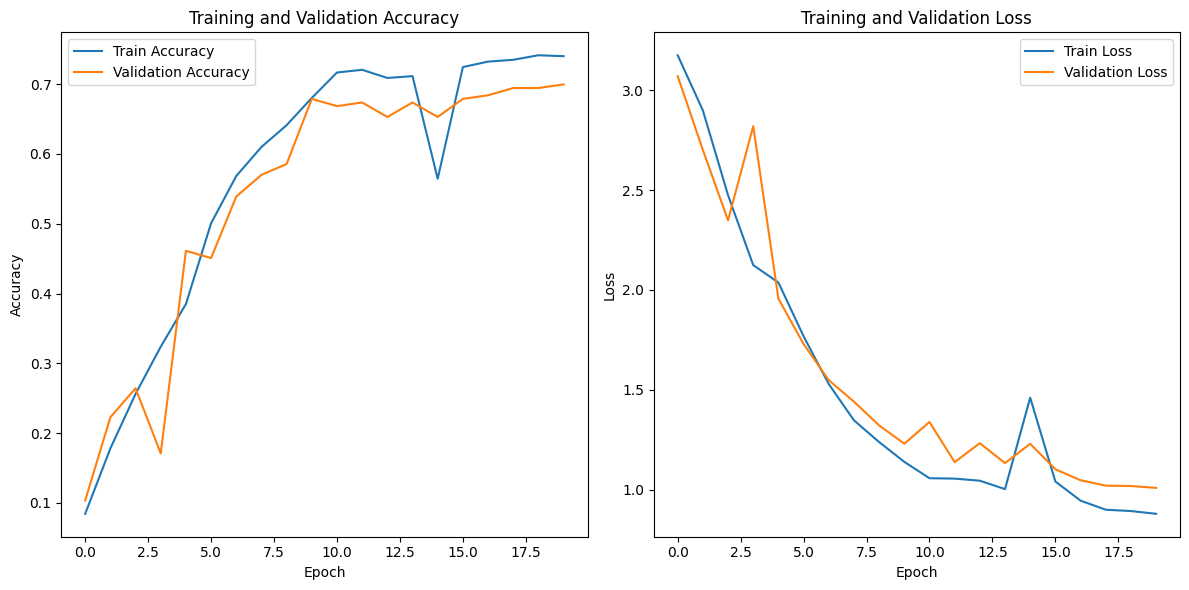

In [9]:
# Visualization of training results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()


##**Save Model and Preprocessors**

In [10]:
# Save model, tokenizer, and label encoder
model.save('best_resume_classifier_model.h5')
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('label_encoder.pickle', 'wb') as handle:
    pickle.dump(label_encoder, handle, protocol=pickle.HIGHEST_PROTOCOL)

##**Template-Based Resume Generator**

In [11]:
# Template-Based Resume Generator
templates = {
    "Software Engineer": "Skilled in software development using languages such as Java, Python, C++, and frameworks like Spring and Hibernate. Experienced in building, testing, and maintaining software applications.",
    "Data Analyst": "Proficient in data collection, cleaning, and visualization. Skilled in using Excel, SQL, and Python to analyze datasets and provide actionable insights.",
    "Network Engineer": "Expert in configuring, managing, and troubleshooting network infrastructure, ensuring efficient data flow, and maintaining network security.",
    "Cloud Architect": "Experienced in designing and managing cloud infrastructure using platforms such as AWS, Azure, and Google Cloud. Skilled in cloud security, scalability, and cost optimization.",
    "Cybersecurity Analyst": "Skilled in protecting IT systems and networks from cyber threats. Experienced in risk analysis, penetration testing, and implementing security protocols.",
    "IT Project Manager": "Proficient in managing IT projects from initiation to completion, ensuring projects are delivered on time and within budget. Experienced in using Agile and Waterfall methodologies.",
    "Data Scientist": "Expert in using machine learning algorithms, statistical modeling, and data visualization techniques to extract insights and create predictive models from large datasets.",
    "DevOps Engineer": "Skilled in automating and optimizing processes in software development and deployment. Experienced with tools like Jenkins, Docker, Kubernetes, and cloud services.",
    "IT Support Analyst": "Provides technical support and troubleshooting for IT systems and applications. Experienced in diagnosing software and hardware issues and offering solutions to users.",
    "UX/UI Designer": "Experienced in designing user-centered interfaces and creating intuitive user experiences. Skilled in wireframing, prototyping, and using design tools like Sketch and Adobe XD.",
    "Database Analyst": "Skilled in designing, managing, and optimizing databases using SQL and other database management systems. Experienced in data migration and performance tuning.",
    "UI Developer": "Proficient in front-end web development using HTML, CSS, and JavaScript. Skilled in creating interactive, responsive user interfaces.",
    "System Administrator": "Experienced in maintaining and configuring computer systems and servers. Skilled in network administration, troubleshooting, and security implementations.",
    "AI/ML Engineer": "Proficient in developing and deploying machine learning models. Experienced in using frameworks like TensorFlow, PyTorch, and scikit-learn to create AI applications.",
    "IT Auditor": "Skilled in assessing IT systems for compliance, identifying risks, and ensuring systems are secure and adhere to industry standards.",
    "Network Security Engineer": "Experienced in securing networks and IT infrastructure. Skilled in firewall configuration, intrusion detection, and vulnerability assessments.",
    "Software Tester": "Experienced in creating and executing test plans, identifying bugs, and ensuring software products meet quality standards.",
    "Cloud Solutions Architect": "Skilled in designing and implementing scalable cloud-based solutions. Expertise in AWS, Azure, and Google Cloud platforms.",
    "IT Consultant": "Provides expert advice on IT solutions to businesses. Experienced in system design, project management, and technology integration.",
    "Front-end Developer": "Proficient in HTML, CSS, JavaScript, and front-end frameworks like React and Angular. Skilled in creating dynamic, user-friendly web pages.",
    "Business Analyst": "Skilled in analyzing business processes and data. Experienced in creating reports and recommending improvements to streamline operations.",
    "IT Helpdesk Support": "Provides first-line technical support for IT-related issues. Skilled in troubleshooting hardware, software, and network problems.",
    "DevSecOps Engineer": "Combines development, security, and operations expertise to ensure secure and efficient software delivery pipelines.",
    "Data Engineer": "Skilled in designing and building data pipelines, transforming raw data into actionable insights, and working with big data tools like Hadoop and Spark.",
    "IT Trainer": "Experienced in providing training on IT systems, software applications, and best practices. Skilled in designing learning modules and workshops.",
    "Cloud Security Engineer": "Expert in securing cloud-based infrastructure and applications. Experienced in threat modeling, encryption, and access control in cloud environments.",
    "IT Procurement Specialist": "Responsible for sourcing and purchasing IT hardware and software. Experienced in vendor management and cost optimization.",
    "UX Researcher": "Skilled in conducting user research to inform design decisions. Expertise in usability testing, user interviews, and surveys.",
    "Blockchain Developer": "Experienced in developing decentralized applications using blockchain technology. Skilled in Solidity and blockchain platforms like Ethereum.",
    "IT Risk Analyst": "Skilled in assessing and mitigating risks in IT systems. Experienced in conducting risk assessments, vulnerability analysis, and risk management strategies.",
    "Cloud Support Engineer": "Provides technical support for cloud infrastructure. Skilled in troubleshooting and optimizing cloud services to meet business needs.",
    "IT Sales Manager": "Responsible for driving sales in IT products and services. Skilled in customer relationship management, sales strategies, and product knowledge.",
    "Data Privacy Officer": "Ensures the protection of personal data and compliance with data privacy laws. Experienced in developing data protection strategies and conducting audits.",
    "Software Architect": "Experienced in designing software systems and defining architecture standards. Skilled in system integration and software design principles.",
    "IT Quality Analyst": "Skilled in ensuring software quality through testing, quality assurance procedures, and continuous improvement.",
    "Mobile App Developer": "Proficient in developing mobile applications for iOS and Android platforms. Skilled in using tools like Swift, Kotlin, and React Native.",
    "IT Procurement Manager": "Oversees procurement of IT products and services. Experienced in vendor management, contract negotiation, and budgeting.",
    "IT Compliance Officer": "Ensures that IT systems and operations comply with industry regulations and internal policies.",
    "Full-stack Developer": "Skilled in both front-end and back-end web development. Experienced in building full-stack applications using technologies like JavaScript, Node.js, and databases.",
    "IT Business Analyst": "Combines business analysis with IT expertise to bridge the gap between business needs and technology solutions.",
    "IT Trainer Assistant": "Assists in training employees on IT systems and tools. Helps in the creation of training materials and user guides.",
    "AI Ethics Consultant": "Advises on ethical considerations in AI development and deployment, ensuring fairness, transparency, and accountability in AI systems.",
    "IT Support Specialist": "Provides support for IT infrastructure, managing hardware, software, and networks to ensure seamless operations.",
    "Data Analytics Manager": "Manages data analytics teams and projects, ensuring efficient data collection, analysis, and reporting for business decision-making.",
    "IT Project Coordinator": "Coordinates IT projects from planning to execution. Manages schedules, budgets, and resources to ensure successful project delivery.",
    "Cloud Solutions Analyst": "Assists in designing cloud-based solutions and optimizations for business needs, focusing on cost-efficiency and scalability.",
    "IT Governance Manager": "Responsible for implementing IT governance policies to ensure IT systems align with business objectives and comply with regulations.",
    "Cybersecurity Engineer": "Specialized in defending IT systems from cyber-attacks. Experienced in network security, encryption, and threat prevention.",
    "IT Procurement Analyst": "Analyzes procurement processes and helps source IT products and services while optimizing costs and ensuring compliance.",
    "Data Science": """A highly skilled professional with expertise in Python, machine learning, and data analysis. Experienced in creating predictive models and generating actionable insights.""",
    "HR": """A human resources professional with extensive experience in recruitment, employee relations, and performance management. Skilled in fostering a positive workplace culture.""",
    "Advocate": """A qualified advocate with in-depth knowledge of legal systems, drafting contracts, and representing clients in court. Adept at providing strategic legal advice.""",
    "Arts": """A creative individual skilled in various art forms including painting, sculpture, and digital design. Passionate about expressing ideas through visual storytelling.""",
    "Web Designing": """Expert in web development using HTML5, CSS3, and JavaScript. Skilled in front-end frameworks like Bootstrap and building responsive websites.""",
    "Mechanical Engineer": """An experienced mechanical engineer specializing in CAD/CAM, thermal engineering, and robotics. Adept at solving complex engineering problems.""",
    "Sales": """A results-driven sales professional skilled in building client relationships, closing deals, and meeting sales targets. Experienced in B2B and B2C environments.""",
    "Health and Fitness": """A certified fitness trainer with expertise in creating personalized workout plans, nutrition guidance, and promoting overall wellness.""",
    "Civil Engineer": """A proficient civil engineer skilled in project management, structural design, and site supervision. Adept at using tools like AutoCAD and SAP2000.""",
    "Java Developer": """Proficient in Java, J2EE, Spring, and Hibernate. Experienced in building scalable enterprise applications and backend systems.""",
    "Business Analyst": """An analytical professional with expertise in gathering requirements, process improvement, and stakeholder management. Skilled in tools like Tableau and Excel.""",
    "SAP Developer": """An experienced SAP developer skilled in ABAP, Fiori, and SAP HANA. Adept at implementing and optimizing SAP solutions for business needs.""",
    "Automation Testing": """An automation testing expert proficient in Selenium, Appium, and JMeter. Experienced in creating robust automated test scripts.""",
    "Electrical Engineering": """A skilled electrical engineer with expertise in circuit design, power systems, and renewable energy solutions. Proficient in tools like MATLAB and PSCAD.""",
    "Operations Manager": """An operations manager with extensive experience in supply chain management, resource allocation, and improving operational efficiency.""",
    "Python Developer": """A Python developer skilled in building web applications, data analysis, and scripting. Experienced with frameworks like Django and Flask.""",
    "DevOps Engineer": """A DevOps engineer with expertise in CI/CD pipelines, containerization using Docker, and orchestration with Kubernetes. Skilled in cloud platforms like AWS and Azure.""",
    "Network Security Engineer": """A network security engineer specializing in securing IT infrastructures, implementing firewalls, and conducting vulnerability assessments.""",
    "PMO": """A project management professional skilled in project planning, resource management, and ensuring timely delivery of milestones.""",
    "Database": """A database expert with hands-on experience in database design, optimization, and administration. Skilled in MySQL, PostgreSQL, and MongoDB.""",
    "Hadoop": """A big data specialist with expertise in Hadoop ecosystem, including HDFS, MapReduce, Hive, and Spark. Skilled in data ingestion and processing.""",
    "ETL Developer": """An ETL developer experienced in designing and implementing ETL pipelines using tools like Informatica and Talend. Skilled in data integration and transformation.""",
    "DotNet Developer": """A .NET developer with expertise in building web and desktop applications using C#, ASP.NET, and MVC frameworks.""",
    "Blockchain": """A blockchain developer with knowledge of smart contracts, Ethereum, and decentralized application (dApp) development. Skilled in Solidity and Hyperledger.""",
    "Testing": """A quality assurance professional skilled in manual and automated testing. Proficient in tools like Selenium, Postman, and JIRA."""
}

def generate_resume_description_template(category):
    return templates.get(category, "Sorry, no description available for this category.")

##**Inference Pipeline**

In [12]:
# Inference pipeline
def preprocess_input(text, tokenizer, max_length):
    text = clean_text(text)
    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=max_length, padding='post')
    return padded_sequence

def predict_category(text, model, tokenizer, label_encoder, max_length):
    padded_sequence = preprocess_input(text, tokenizer, max_length)
    prediction = model.predict(padded_sequence)
    predicted_label = np.argmax(prediction)
    return label_encoder.inverse_transform([predicted_label])[0]

In [13]:
# Test prediction and template generation
loaded_model = tf.keras.models.load_model('best_resume_classifier_model.h5')
with open('tokenizer.pickle', 'rb') as handle:
    loaded_tokenizer = pickle.load(handle)
with open('label_encoder.pickle', 'rb') as handle:
    loaded_label_encoder = pickle.load(handle)

In [14]:
# Test prediction
sample_resume = """Experienced in Python, R, and data visualization tools. Skilled in machine learning and analytics."""
predicted_category = predict_category(sample_resume, loaded_model, loaded_tokenizer, loaded_label_encoder, max_length)
print("Predicted Category:", predicted_category)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
Predicted Category: Java Developer


In [15]:
# Example: Generate resume description from category
resume_description = generate_resume_description_template(predicted_category)
print("\nGenerated Resume Description:")
print(resume_description)


Generated Resume Description:
Proficient in Java, J2EE, Spring, and Hibernate. Experienced in building scalable enterprise applications and backend systems.


In [16]:
# Test with another category
test_category = "Network Security Engineer"
generated_description = generate_resume_description_template(test_category)
print(f"\nGenerated Resume Description for {test_category}:")
print(generated_description)


Generated Resume Description for Network Security Engineer:
A network security engineer specializing in securing IT infrastructures, implementing firewalls, and conducting vulnerability assessments.


### **Template-Based Resume Abstrak Generator**

In [17]:
# Template-Based Resume Abstrak Generator
templates = {
    "Data Science": """A highly skilled professional with expertise in Python, machine learning, and data analysis.
Experienced in creating predictive models and generating actionable insights.""",

    "HR": """A human resources professional with extensive experience in recruitment, employee relations, and performance management. Skilled in fostering a positive workplace culture.""",

    "Advocate": """A qualified advocate with in-depth knowledge of legal systems, drafting contracts, and representing clients in court. Adept at providing strategic legal advice.""",

    "Arts": """A creative individual skilled in various art forms including painting, sculpture, and digital design. Passionate about expressing ideas through visual storytelling.""",

    "Web Designing": """Expert in web development using HTML5, CSS3, and JavaScript. Skilled in front-end frameworks like Bootstrap and building responsive websites.""",

    "Mechanical Engineer": """An experienced mechanical engineer specializing in CAD/CAM, thermal engineering, and robotics. Adept at solving complex engineering problems.""",

    "Sales": """A results-driven sales professional skilled in building client relationships, closing deals, and meeting sales targets. Experienced in B2B and B2C environments.""",

    "Health and Fitness": """A certified fitness trainer with expertise in creating personalized workout plans, nutrition guidance, and promoting overall wellness.""",

    "Civil Engineer": """A proficient civil engineer skilled in project management, structural design, and site supervision. Adept at using tools like AutoCAD and SAP2000.""",

    "Java Developer": """A proficient Java developer with hands-on experience in J2EE, Spring, Hibernate, and database management using MySQL and PostgreSQL. Skilled in building robust backend systems.""",

    "Business Analyst": """An analytical professional with expertise in gathering requirements, process improvement, and stakeholder management. Skilled in tools like Tableau and Excel.""",

    "SAP Developer": """An experienced SAP developer skilled in ABAP, Fiori, and SAP HANA. Adept at implementing and optimizing SAP solutions for business needs.""",

    "Automation Testing": """An automation testing expert proficient in Selenium, Appium, and JMeter. Experienced in creating robust automated test scripts.""",

    "Electrical Engineering": """A skilled electrical engineer with expertise in circuit design, power systems, and renewable energy solutions. Proficient in tools like MATLAB and PSCAD.""",

    "Operations Manager": """An operations manager with extensive experience in supply chain management, resource allocation, and improving operational efficiency.""",

    "Python Developer": """A Python developer skilled in building web applications, data analysis, and scripting. Experienced with frameworks like Django and Flask.""",

    "DevOps Engineer": """A DevOps engineer with expertise in CI/CD pipelines, containerization using Docker, and orchestration with Kubernetes. Skilled in cloud platforms like AWS and Azure.""",

    "Network Security Engineer": """A network security engineer specializing in securing IT infrastructures, implementing firewalls, and conducting vulnerability assessments.""",

    "PMO": """A project management professional skilled in project planning, resource management, and ensuring timely delivery of milestones.""",

    "Database": """A database expert with hands-on experience in database design, optimization, and administration. Skilled in MySQL, PostgreSQL, and MongoDB.""",

    "Hadoop": """A big data specialist with expertise in Hadoop ecosystem, including HDFS, MapReduce, Hive, and Spark. Skilled in data ingestion and processing.""",

    "ETL Developer": """An ETL developer experienced in designing and implementing ETL pipelines using tools like Informatica and Talend. Skilled in data integration and transformation.""",

    "DotNet Developer": """A .NET developer with expertise in building web and desktop applications using C#, ASP.NET, and MVC frameworks.""",

    "Blockchain": """A blockchain developer with knowledge of smart contracts, Ethereum, and decentralized application (dApp) development. Skilled in Solidity and Hyperledger.""",

    "Testing": """A quality assurance professional skilled in manual and automated testing. Proficient in tools like Selenium, Postman, and JIRA.""",
}

def generate_cv_summary(job_category):
    """
    Generate a CV summary based on the desired job category.

    Parameters:
        job_category (str): The job category chosen by the user (e.g., 'Data Science').

    Returns:
        str: A short CV summary or a message if the category is not available.
    """
    return templates.get(job_category, "Sorry, we don't have a summary for this job category yet.")


In [18]:
# Simulasi input user
user_desired_job = input("Enter the job you want (e.g., Data Science, Web Developer): ").strip()

Enter the job you want (e.g., Data Science, Web Developer): Data Science


In [19]:
# Generate abstrak CV
cv_summary = generate_cv_summary(user_desired_job)
print("\nGenerated CV Abstract:")
print(cv_summary)


Generated CV Abstract:
A highly skilled professional with expertise in Python, machine learning, and data analysis.
Experienced in creating predictive models and generating actionable insights.
